In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression

In [73]:
df=pd.read_csv("C:/Users/RSB - Thangaraj/Task_files/tn.csv")

In [74]:
df['Yield'] = df['Production'] / df['Area']

In [75]:
df = df.drop(['District_Id','Crop_Id'],axis=1)
df

,State,District,Year,Season,Crop,Area,Production,Yield
0,Tamil Nadu,ARIYALUR,2008,Kharif,Rice,24574,76113.0,3.097298
1,Tamil Nadu,ARIYALUR,2008,Whole Year,Arhar/Tur,209,159.0,0.760766
2,Tamil Nadu,ARIYALUR,2008,Whole Year,Bajra,565,949.0,1.679646
3,Tamil Nadu,ARIYALUR,2008,Whole Year,Banana,190,8168.0,42.989474
4,Tamil Nadu,ARIYALUR,2008,Whole Year,Cashewnut,31113,9951.0,0.319834
...,...,...,...,...,...,...,...,...
13310,Tamil Nadu,VIRUDHUNAGAR,2013,Whole Year,Small millets,1187,676.0,0.569503
13311,Tamil Nadu,VIRUDHUNAGAR,2013,Whole Year,Sugarcane,2917,296017.0,101.479945
13312,Tamil Nadu,VIRUDHUNAGAR,2013,Whole Year,Sweet potato,4,84.0,21.000000
13313,Tamil Nadu,VIRUDHUNAGAR,2013,Whole Year,Tapioca,4,120.0,30.000000


In [196]:
print(blue(("Please select the District you want to predict : ",df.District.unique()),['bold']))
dist = str(input("Enter the District : ").upper())
District = dist
print(green(("Please select the District you want to predict : ",df.Crop.unique()),['bold']))
crop = str(input("Enter the Crop : ")).capitalize()
Crop = crop
area = input("Enter the Land Area : ")
Area=int(area)

('Please select the District you want to predict : ', array(['ARIYALUR', 'COIMBATORE', 'CUDDALORE', 'DHARMAPURI', 'DINDIGUL',
       'ERODE', 'KANCHIPURAM', 'KANNIYAKUMARI', 'KARUR', 'KRISHNAGIRI',
       'MADURAI', 'NAGAPATTINAM', 'NAMAKKAL', 'PERAMBALUR', 'PUDUKKOTTAI',
       'RAMANATHAPURAM', 'SALEM', 'SIVAGANGA', 'THANJAVUR',
       'THE NILGIRIS', 'THENI', 'THIRUVALLUR', 'THIRUVARUR',
       'TIRUCHIRAPPALLI', 'TIRUNELVELI', 'TIRUPPUR', 'TIRUVANNAMALAI',
       'TUTICORIN', 'VELLORE', 'VILLUPURAM', 'VIRUDHUNAGAR'], dtype=object))
Enter the District : THE NILGIRIS
('Please select the District you want to predict : ', array(['Rice', 'Arhar/Tur', 'Bajra', 'Banana', 'Cashewnut', 'Castor seed',
       'Coconut ', 'Coriander', 'Cotton(lint)', 'Dry chillies',
       'Groundnut', 'Jowar', 'Maize', 'Moong(Green Gram)', 'Onion',
       'Ragi', 'Sugarcane', 'Sunflower', 'Sweet potato', 'Tapioca',
       'Turmeric', 'Urad', 'Small millets', 'Sesamum', 'Horse-gram',
       'Tobacco', 'Black p

In [197]:
df1 = df.loc[(df['District'] == District) & (df['Crop'] == Crop)]
df1

,State,District,Year,Season,Crop,Area,Production,Yield
8214,Tamil Nadu,THE NILGIRIS,1997,Whole Year,Potato,3357,55410.0,16.505809
8236,Tamil Nadu,THE NILGIRIS,1998,Whole Year,Potato,1756,28986.0,16.506834
8256,Tamil Nadu,THE NILGIRIS,1999,Whole Year,Potato,2415,47729.0,19.763561
8277,Tamil Nadu,THE NILGIRIS,2000,Whole Year,Potato,1293,26501.0,20.495746
8320,Tamil Nadu,THE NILGIRIS,2002,Whole Year,Potato,1457,28325.0,19.440631
8368,Tamil Nadu,THE NILGIRIS,2003,Whole Year,Potato,1720,33055.0,19.218023
8386,Tamil Nadu,THE NILGIRIS,2004,Whole Year,Potato,2010,38288.0,19.048756
8400,Tamil Nadu,THE NILGIRIS,2005,Whole Year,Potato,1950,43949.0,22.537949
8415,Tamil Nadu,THE NILGIRIS,2006,Whole Year,Potato,1957,39498.0,20.182933
8432,Tamil Nadu,THE NILGIRIS,2007,Whole Year,Potato,1540,36982.0,24.014286


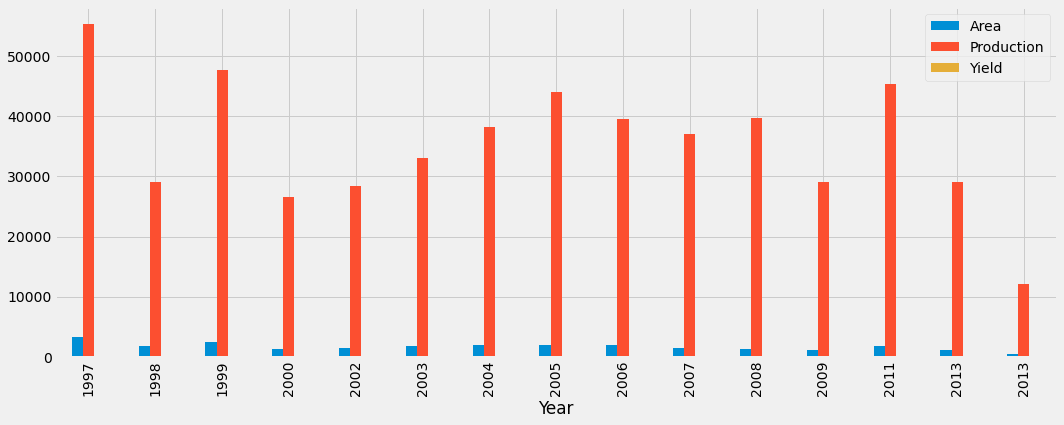

In [198]:
plotdf = df1[['Year','Area','Production','Yield']].set_index('Year')
plotdf.plot(kind='bar',figsize=(16,6))

In [199]:
x = df1[['Area']]
y = df1[['Production']]

In [222]:
x.shape

(15, 1)

In [223]:
y.shape

(15, 1)

In [203]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import *

In [204]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2)

In [205]:
x_train

,Area
8415,1957
8277,1293
8467,1161
8214,3357
8236,1756
8499,449
8368,1720
8449,1292
8497,1098
8400,1950


In [206]:
x_test

,Area
8256,2415
8432,1540
8486,1786


In [207]:
y_train

,Production
8415,39498.0
8277,26501.0
8467,29065.0
8214,55410.0
8236,28986.0
8499,12026.0
8368,33055.0
8449,39641.0
8497,29042.0
8400,43949.0


In [208]:
y_test

,Production
8256,47729.0
8432,36982.0
8486,45440.0


In [209]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(12, 1)
(3, 1)
(12, 1)
(3, 1)


In [221]:
LR_model = LinearRegression()
LR_model.fit(x_train,y_train)
y_pred1 = LR_model.predict([[Area]])
y_pred1

array([[31941.03343606]])

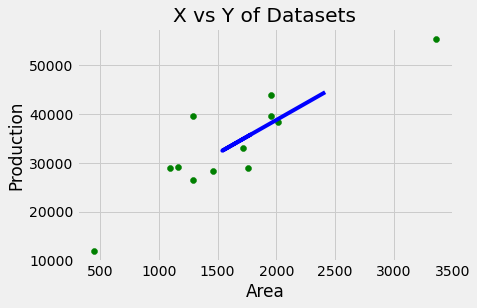

In [211]:
plt.style.use('fivethirtyeight')
plt.scatter(x_train,y_train,color="green")
plt.plot(x_test,y_pred1,color="blue")
plt.xlabel("Area")
plt.ylabel("Production")
plt.title("X vs Y of Datasets")
plt.show()

In [179]:
pre_result = {"Original":y_test.to_numpy().ravel(),"Predicted":y_pred1.ravel()}
pre_result

{'Original': array([722576., 489770., 427142., 354937.]),
 'Predicted': array([580008.3744179 , 582879.20806572, 499241.95400589, 320569.74055606])}

In [212]:
LR_model.score(x_test,y_test)

-0.9191397396660475

In [213]:
r2_score(y_test,y_pred1)

-0.9191397396660475

In [220]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import *
RF_model = RandomForestRegressor()
RF_model.fit(x_train,y_train.values.ravel())
y_pred2 = RF_model.predict(x_test)

In [215]:
y_pred2

array([38586.39, 29464.48, 32243.6 ])

In [216]:
RF_model.score(y_test,y_pred2)

-17.854671128899

In [184]:
result = {
        "Mean Absolute Error" : mean_absolute_error(y_test,y_pred2),
        "Mean Squared Error" : mean_squared_error(y_test,y_pred2),
        "Accuracy of the model" : r2_score(y_test,y_pred2)*100
       }

In [185]:
result

{'Mean Absolute Error': 115071.9225,
 'Mean Squared Error': 23257901555.125626,
 'Accuracy of the model': -22.428500280503517}

In [217]:
pre_result1 = {"Original":y_test.to_numpy().ravel(),"Predicted":y_pred2.ravel()}
pre_result1

{'Original': array([47729., 36982., 45440.]),
 'Predicted': array([38586.39, 29464.48, 32243.6 ])}